### Implementacija razreda Graph

In [129]:
""" Razred Graph() i popratne slike preuzeti sa stranice:
https://www.python-course.eu/graphs_python.php
"""

class Graph(object):

    def __init__(self, graph_dict=None):
        """ inicijalizacija objekta:
            ako ništa nije predano inicijalizira se prazna struktura rječnika
        """
        if graph_dict == None:
            graph_dict = {}
        self._graph_dict = graph_dict

    def edges(self, vertice):
        """ vraća listu bridova za neki vrh"""
        return self._graph_dict[vertice]
        
    def all_vertices(self):
        """ vraća vrhove grafa """
        return set(self._graph_dict.keys())

    def all_edges(self):
        """ vraća bridove grafa """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ dodavanje novog vrha """
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []

    def add_edge(self, edge):
        """ dodavanje brida """
        edge = set(edge)
        vertex1, vertex2 = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                self._graph_dict[x].append(y)
            else:
                self._graph_dict[x] = [y]

    def __generate_edges(self):
        """ metoda za dobivanje liste bridova grafa """ 
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges
    
    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj
    
    def __next__(self):
        """ pomoćna metoda za iteriranje kroz vrhove """
        return next(self._iter_obj)

    def __str__(self):
        res = "vrhovi: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nrubovi: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    def find_path(self, start_vertex, end_vertex, path=None):
        """ pronalaženje puta između dva vrha """
        if path == None:
            path = []
        graph = self._graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return path
        if start_vertex not in graph:
            return None
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_path = self.find_path(vertex, 
                                               end_vertex, 
                                               path)
                if extended_path: 
                    return extended_path
        return None
    
    
    def find_all_paths(self, start_vertex, end_vertex, path=[]):
        """ pronalaženje svih puteva između dva vrha """
        graph = self._graph_dict 
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return [path]
        if start_vertex not in graph:
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_paths = self.find_all_paths(vertex, 
                                                     end_vertex, 
                                                     path)
                for p in extended_paths: 
                    paths.append(p)
        return paths
    
    def vertex_degree(self, vertex):
        """ vraća stupanj vrha """ 
        degree =  len(self._graph_dict[vertex]) 
        if vertex in self._graph_dict[vertex]:
            degree += 1
        return degree

    def find_isolated_vertices(self):
        """ vraća listu izoliranih vrhova """
        graph = self._graph_dict
        isolated = []
        for vertex in graph:
            print(isolated, vertex)
            if not graph[vertex]:
                isolated += [vertex]
        return isolated
        
    def Delta(self):
        """ najveći stupanj između svih vrhova """
        max = 0
        for vertex in self._graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree > max:
                max = vertex_degree
        return max
    
    def degree_sequence(self):
        """ vraća sekvencu stupnjeva """
        seq = []
        for vertex in self._graph_dict:
            seq.append(self.vertex_degree(vertex))
        seq.sort(reverse=True)
        return tuple(seq)
    
    def density(self):
        """ izračun gustoće grafa """
        g = self._graph_dict
        V = len(g.keys())
        E = len(self.all_edges())
        return 2.0 * E / (V *(V - 1))
    
    def diameter(self):
        """ izračun dijametra grafa"""
        
        v = tuple(self.all_vertices()) 
        pairs = [ (v[i],v[j]) for i in range(len(v)-1) for j in range(i+1, len(v))]
        smallest_paths = []
        for (s,e) in pairs:
            paths = self.find_all_paths(s,e)
            smallest = sorted(paths, key=len)[0]
            smallest_paths.append(smallest)

        smallest_paths.sort(key=len)

        # longest path is at the end of list, 
        # i.e. diameter corresponds to the length of this path
        diameter = len(smallest_paths[-1])-1
        return diameter

## Crtanje grafova uporabom NetworkX modula

In [130]:
# Metoda za crtanje grafa
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph):
    # stvaranje NetworkX graf objekta 
    G=nx.Graph()

    # dodavanje rubova
    for edge in graph:
        vertex1 = edge.pop()
        if edge:
            # nije petlja
            vertex2 = edge.pop()
        else:
            # petlja
            vertex2 = vertex1
        G.add_edge(vertex1, vertex2, weigth=1)

    # Postoje različiti predlošci grafa: 'shell', 'spring', 'spectral' and 'random'. Ovdje se koristi 'shell' i 'spring'.
    #graph_pos = nx.shell_layout(G)
    graph_pos = nx.spring_layout(G)

    # crtanje čvorova, bridova i labela
    nx.draw_networkx_nodes(G, graph_pos, node_size=1000, node_color='blue', alpha=0.3)
    nx.draw_networkx_edges(G, graph_pos)
    nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')
    
    print("dijametar: ", nx.diameter(G))

    # prikaz slike grafa
    plt.show()

# Kôd za pokretanje zadataka

Upoznati se razredom Graph i s funkcijom za crtanje grafa pomoću NetworkX modula.

1. Dopuniti postojeći rječnik s dodatnih šest osoba (povezivanje po vlastitoj volji).
2. Nacrtati graf nakon proširenja i formiranja.
3. Ispisati graf nakon formiranja.
4. Ispisati stupnjeve svih vrhova grafa.
5. Ispisati putanje za pet različitih parova osoba.
6. Ispisati dijametar grafa.
7. Ispisati gustoću grafa i diskutirati dobiveni rezultat.
8. Ispisati sve bridove grafa.
9. Ispisati sekvencu stupnjeva vrhova.
10. Temeljem analize centralnosti grafa odrediti čvor s najvećim utjecajem na prijatelje.

In [131]:
from operator import itemgetter

# Primjer grafa - dopuniti sa svim zadacima
if __name__ == "__main__":
    
    """ Zadaje se rječnik male skupine neke društvene mreže koja se oblikuje kao graf"""    
    g = { "Petar"  : ["Maja", "Robert", "Josip"],
          "Maja"   : ["Petar", "Ivo", "Ana"],
          "Robert" : ["Petar", "Mia", "Ljilja", "Mijo"],
          "Josip"  : ["Petar", "Alen", "Ena"],
          "Goran"  : ["Ljilja", "Alen", "Zoran"],
          "Ljilja" : ["Robert", "Goran"],
          "Alen"   : ["Goran", "Josip"],
          "Ivo"    : ["Maja"],
          "Ana"    : ["Maja"],
          "Mia"    : ["Robert"],
          "Zoran"  : ["Goran"],    
          "Ena"    : ["Josip"],
          "Mijo"   : ["Robert"]
        }
    
    """formiranje grafa pomoću razreda Graph """ 
    graph = Graph(g)

Zadatak 2: izgled grafa
dijametar:  6


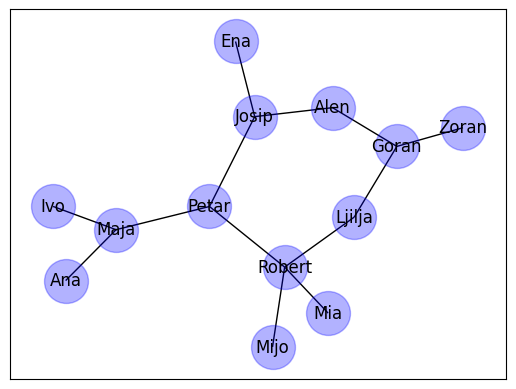

In [132]:
print("Zadatak 2: izgled grafa")
graph_crtaj = graph.all_edges()
draw_graph(graph_crtaj)

In [133]:
print("Zadatak 3: vrhovi i bridovi")
print(graph.all_edges())
print(graph.all_vertices())

Zadatak 3: vrhovi i bridovi
[{'Petar', 'Maja'}, {'Petar', 'Robert'}, {'Petar', 'Josip'}, {'Ivo', 'Maja'}, {'Maja', 'Ana'}, {'Robert', 'Mia'}, {'Robert', 'Ljilja'}, {'Robert', 'Mijo'}, {'Josip', 'Alen'}, {'Josip', 'Ena'}, {'Goran', 'Ljilja'}, {'Goran', 'Alen'}, {'Goran', 'Zoran'}]
{'Maja', 'Alen', 'Mia', 'Josip', 'Ljilja', 'Mijo', 'Zoran', 'Petar', 'Robert', 'Ena', 'Ana', 'Ivo', 'Goran'}


In [134]:
print("Zadatak 4: stupnjevi vrhova")
print(graph.degree_sequence())

Zadatak 4: stupnjevi vrhova
(4, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1)


In [135]:
print("Zadatak 5: putanje između vrhova")

for ime in ['Robert', 'Ena', 'Ana', 'Ivo', 'Goran']:
    print(f'{ime}: {graph.vertex_degree(ime)}')

Zadatak 5: putanje između vrhova
Robert: 4
Ena: 1
Ana: 1
Ivo: 1
Goran: 3


In [136]:
print("Zadatak 6: dijametar")
print(graph.diameter())

Zadatak 6: dijametar
6


In [137]:
print("Zadatak 7: gustoća")
print(graph.density())

Zadatak 7: gustoća
0.16666666666666666


In [138]:
print("Zadatak 8: ispis bridova")
print(graph)

Zadatak 8: ispis bridova
vrhovi: Petar Maja Robert Josip Goran Ljilja Alen Ivo Ana Mia Zoran Ena Mijo 
rubovi: {'Petar', 'Maja'} {'Petar', 'Robert'} {'Petar', 'Josip'} {'Ivo', 'Maja'} {'Maja', 'Ana'} {'Robert', 'Mia'} {'Robert', 'Ljilja'} {'Robert', 'Mijo'} {'Josip', 'Alen'} {'Josip', 'Ena'} {'Goran', 'Ljilja'} {'Goran', 'Alen'} {'Goran', 'Zoran'} 


In [139]:
print("Zadatak 9: sekvenca stupnjeva čvorova")

print(graph.degree_sequence())

Zadatak 9: sekvenca stupnjeva čvorova
(4, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1)


In [140]:
print("Zadatak 10: čvor s najvećim izravnim utjecajem na prijatelje")
# Pomoć: stvaranje NetworkX graf objekta 
G=nx.Graph()
G.add_nodes_from(g.keys())
for k, v in g.items():
    G.add_edges_from(([(k, t) for t in v]))

degrees = list(G.degree)
degrees.sort(key= lambda m: m[1], reverse=True)
print(f'Degrees: {degrees[0]}')

Zadatak 10: čvor s najvećim izravnim utjecajem na prijatelje
Degrees: ('Robert', 4)


# LMS

In [141]:
import networkx as nx

ljudi = {"Damir": ["Josip"],
         "Josip": ["Damir", "Mirjana", "Marko", "Ivica"],
         "Mirjana": ["Josip", "Marko"],
         "Marko": ["Mirjana", "Josip", "Stjepan", "Ivan"],
         "Ivica": ["Josip", "Ana"],
         "Stjepan": ["Marko", "Ana"],
         "Ivan": ["Marko", "Tomislav"],
         "Tomislav": ["Ivan", "Ivana"],
         "Ana": ["Stjepan", "Ivica", "Ivana"],
         "Ivana": ["Tomislav", "Ana", "Dragica"],
         "Dragica": ["Ivana", "Marija"],
         "Marija": ["Nada", "Dragica"],
         "Nada": ["Marija", "Vesna", "Josip"],
         "Vesna": ["Nada"]}

g = nx.Graph(ljudi)
G = Graph(ljudi)

print(f'Dijametar: {nx.diameter(g)}')
print(f'Dijametar: {G.diameter()}') #KRIVO

# Gustoca = 2 * E / (V * (V - 1))
density = 2 * len(g.edges) / (len(ljudi) * (len(ljudi) - 1))
print(f'Gustoca: {round(density, 3)}')
print(f'Gustoca: {round(G.density(), 3)}')

# Stupanj - koliko veza ima cvor
degrees = list(g.degree)
degrees.sort(key= lambda m: m[1], reverse=True)
print(f'Stupnjevi: {degrees}')
print(f'Stupnjevi: {G.Delta()}') #KRIVO

Dijametar: 5
Dijametar: 7
Gustoca: 0.187
Gustoca: 0.187
Stupnjevi: [('Josip', 5), ('Marko', 4), ('Ana', 3), ('Ivana', 3), ('Nada', 3), ('Mirjana', 2), ('Ivica', 2), ('Stjepan', 2), ('Ivan', 2), ('Tomislav', 2), ('Dragica', 2), ('Marija', 2), ('Damir', 1), ('Vesna', 1)]
Stupnjevi: 4
